# WMM Laboratorium 1

Autorzy:
- Kacper Siemionek, 331430
- Wojciech Zieziula, 327417

## Potrzebne biblioteki

In [313]:
import numpy as np
import matplotlib.pyplot as plt
import time

## Zadanie 1a

Obliczenia niezbędne do stworzenia wykresów:

In [314]:
N_points = 8
period = 2
sampling_freq = N_points / period
time_vals = np.linspace(0, period, N_points, endpoint=False)
signal = np.cos(np.pi * time_vals)

fft_res = np.fft.fft(signal)
amp_spectrum = np.abs(fft_res) / N_points
frequencies = np.fft.fftfreq(N_points, d=period / N_points)
phases = np.angle(fft_res)
threshold = 1e-10

for i in range(N_points):
    if amp_spectrum[i] < threshold:
        phases[i] = 0
    else:
        if i != 0 and i != N_points // 2:
            phases[i] = np.pi if np.real(fft_res[i]) < 0 else 0


Przebieg sygnału spróbkowanego

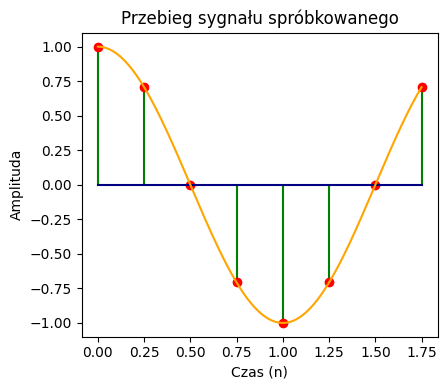

In [315]:
plt.figure(figsize=(12, 4))

plt.subplot(1, 3, 1)
plt.stem(time_vals, signal, linefmt="green", markerfmt="ro", basefmt="navy")
cos_time_x = np.arange(0, 1.75, step=0.0001)
cos_time_y = np.cos(np.pi * cos_time_x)
plt.plot(cos_time_x, cos_time_y, color="orange")

plt.title("Przebieg sygnału spróbkowanego")
plt.xlabel("Czas (n)")
plt.ylabel("Amplituda")

plt.tight_layout()
plt.show()


Widmo amplitudowe

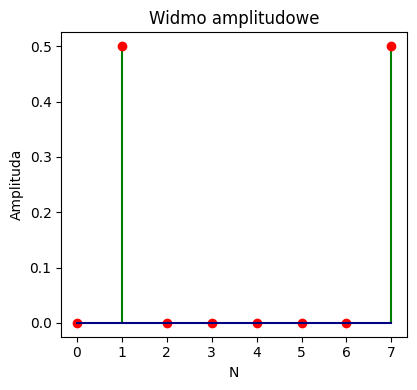

In [316]:
plt.figure(figsize=(12, 4))

plt.subplot(1, 3, 2)
plt.stem(time_vals * sampling_freq, amp_spectrum, linefmt="green", markerfmt="ro", basefmt="navy")
plt.title("Widmo amplitudowe")
plt.xlabel("N")
plt.ylabel("Amplituda")

plt.tight_layout()
plt.show()

Widmo fazowe

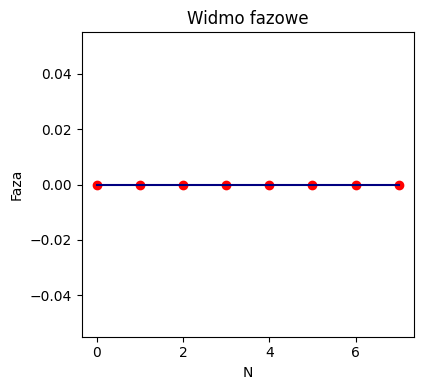

In [317]:
plt.figure(figsize=(12, 4))

plt.subplot(1, 3, 3)
plt.stem(time_vals * sampling_freq, phases, linefmt="green", markerfmt="ro", basefmt="navy")
plt.title("Widmo fazowe")
plt.xlabel("N")
plt.ylabel("Faza")

plt.tight_layout()
plt.show()

Sprawdzenie twierdzenia Parsevala

In [318]:
parseval_check = np.sum(signal ** 2) == np.sum(np.abs(fft_res) ** 2) / N_points
print(f"Twierdzenie Parsevala: {np.sum(signal**2)} = {np.sum(np.abs(fft_res)**2) / N_points} jest {'prawdziwe' if parseval_check else 'nieprawdziwe'} ")

Twierdzenie Parsevala: 4.0 = 4.0 jest prawdziwe 


## Zadanie 1b

Wykres czasu wykonania dla innych n

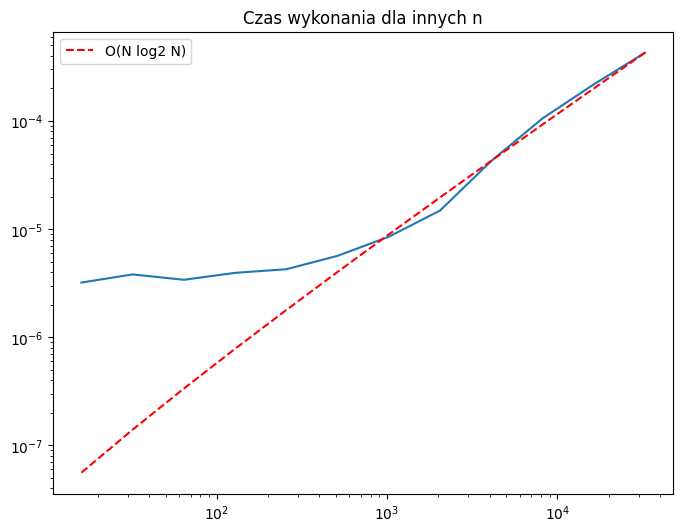

In [319]:
powers = np.arange(4, 16)
sizes = 2 ** powers
times = []
for size in sizes:
    times_avg = []
    for _ in range(1000):
        time_signal = np.arange(size)
        x = np.cos(np.pi * time_signal)
        start_time = time.time()
        _ = np.fft.fft(x)
        end_time = time.time()
        times_avg.append(end_time - start_time)
    times.append(np.average(times_avg))

plt.figure(figsize=(8, 6))
plt.yscale('log')
plt.xscale('log')
plt.plot(sizes, times)

c = times[-1] / (sizes[-1] * np.log2(sizes[-1]))
nlogn_times = c * sizes * np.log2(sizes)

plt.plot(sizes, nlogn_times, 'r--', label="O(N log2 N)")

plt.legend()
plt.title("Czas wykonania dla innych n")
plt.show()

Na powyższym wykresie widać, że dla większych wartości N czas wykonania zbliża się do czerwonej, przerywanej linii, co potwierdza, że FFT ma złożoność O(N log N).

## Zadanie 2

Dane z treści zadania:

In [320]:
A = 2
N = 48
signal_function = lambda n: A * np.cos(2 * np.pi * n / N)

Funkcja do przedstawiania wykresów widma amplitudowego i fazowego sygnału przesuniętego o n0

In [321]:
def plot_fft_spectrum(N, n0, shift_label):
    sample_indices = np.arange(N)
    shifted_signal = signal_function(sample_indices - n0)

    fft_result = np.fft.fft(shifted_signal)
    amplitude_spectrum = np.abs(fft_result) / N
    phase_spectrum = np.angle(fft_result)

    eps_threshold = 1e-10
    phase_spectrum[amplitude_spectrum < eps_threshold] = 0
    phase_spectrum[np.abs(phase_spectrum) < eps_threshold] = 0

    fig, axes = plt.subplots(1, 2, figsize=(10, 5))

    axes[0].stem(sample_indices, amplitude_spectrum, linefmt="g-", markerfmt="o", basefmt="r-")
    axes[0].set(title=f"Widmo amplitudowe {shift_label}", xlabel="N", ylabel="Amplituda")

    axes[1].stem(sample_indices, phase_spectrum, linefmt="c-", markerfmt="o", basefmt="r-")
    axes[1].set(title=f"Widmo fazowe {shift_label}", xlabel="N", ylabel="Faza (radiany)")
    axes[1].set_yticks([-np.pi, -np.pi/2, 0, np.pi/2, np.pi], ["-π", "-π/2", "0", "π/2", "π"])

    plt.tight_layout()
    plt.show()

Wykres dla n0 = 0

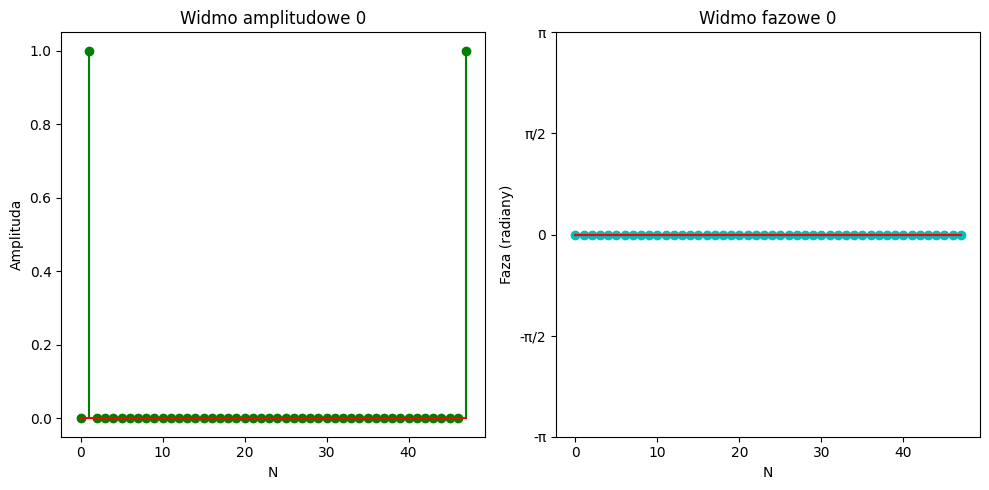

In [322]:
plot_fft_spectrum(N, n0=0, shift_label="0")

Wykres dla n0 = N / 4

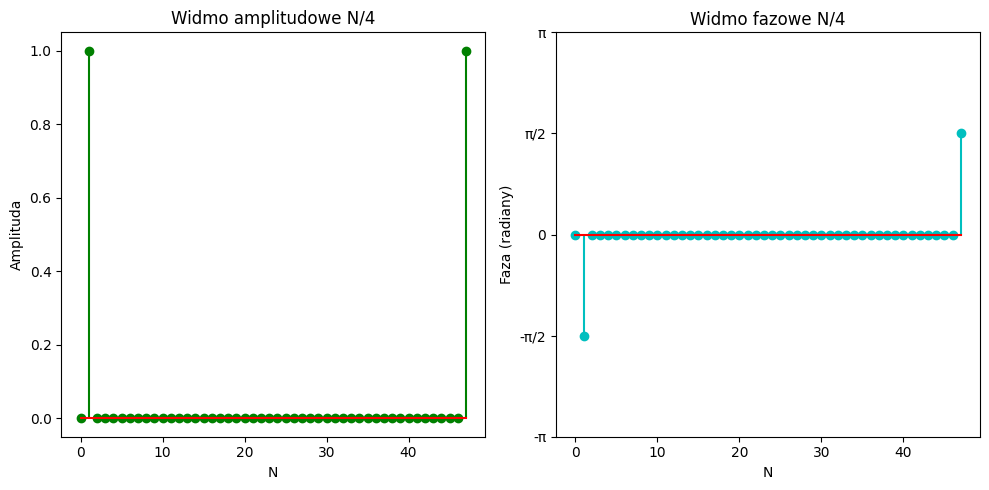

In [323]:
plot_fft_spectrum(N, n0=N/4, shift_label="N/4")

Wykres dla n0 = N / 2

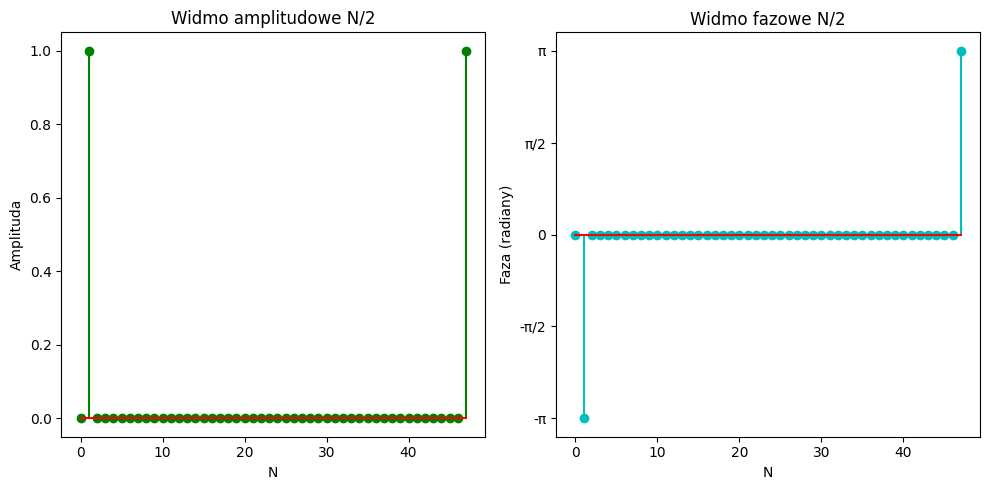

In [324]:
plot_fft_spectrum(N, n0=N/2, shift_label="N/2")

Wykres dla n0 = 3N / 4

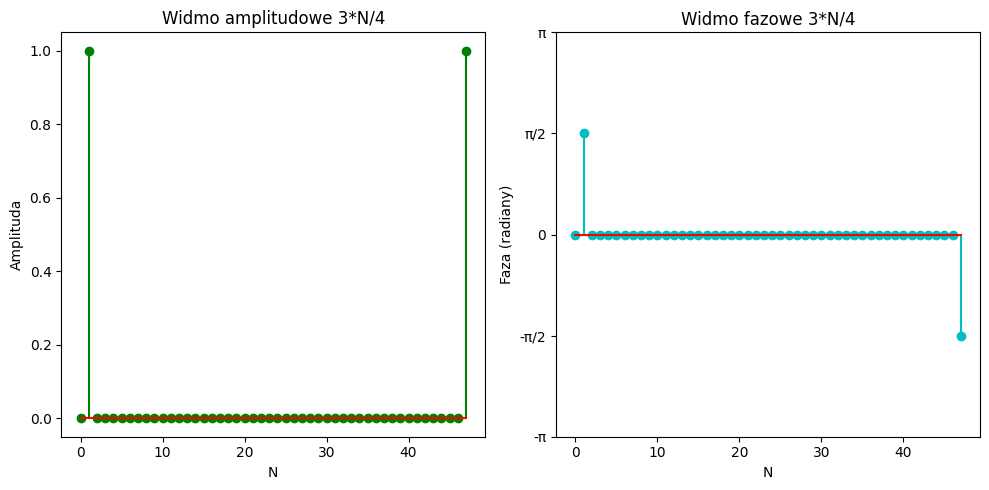

In [325]:
plot_fft_spectrum(N, n0=3*N/4, shift_label="3*N/4")

Wnioski:
- Bez względu na wartość przesunięcia n0, widmo amplitudowe pozostaje niezmienne.
- Faza zmienia się liniowo, zgodnie z teorią przekształcenia Fouriera.
- Zmiany fazy są cykliczne w zakresie [−π, π], co wynika z okresowości funkcji trygonometrycznych.

## Zadanie 3

Dane z treści zadania:

In [326]:
A = 3
N = 10
signal = np.array([A * (1 - (n % N) / N) for n in range(N)])

Funkcja do przedstawiania wykresów widma amplitudowego i fazowego sygnału dopełnionego podaną ilością zer:

In [327]:
def spectrum_plot(value, signal, N):
    with_zeros = np.zeros(N + value)
    with_zeros[:N] = signal

    amp_spectrum = np.abs(np.fft.fft(with_zeros))
    phase_spectrum = np.angle(np.fft.fft(with_zeros))

    fig, axs = plt.subplots(1, 2, figsize=(12, 4))

    axs[0].stem(amp_spectrum, linefmt='b', markerfmt='bo', basefmt='b')
    axs[0].set_title(f'Widmo Amplitudowe ({int(value / 10)}N)')
    axs[0].grid(True)

    axs[1].stem(phase_spectrum, linefmt='r', markerfmt='ro', basefmt='r')
    axs[1].set_title(f'Widmo Fazowe ({int(value / 10)}N)')
    axs[1].grid(True)

    plt.tight_layout()
    plt.show()

Wykresy dla dopełnienia równego 0:

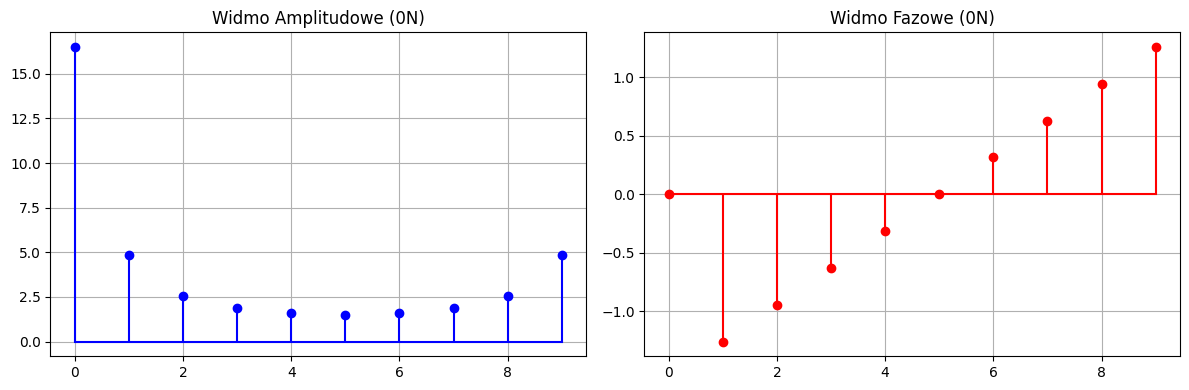

In [328]:
spectrum_plot(0, signal, N)

Wykresy dla dopełnienia równego 10:

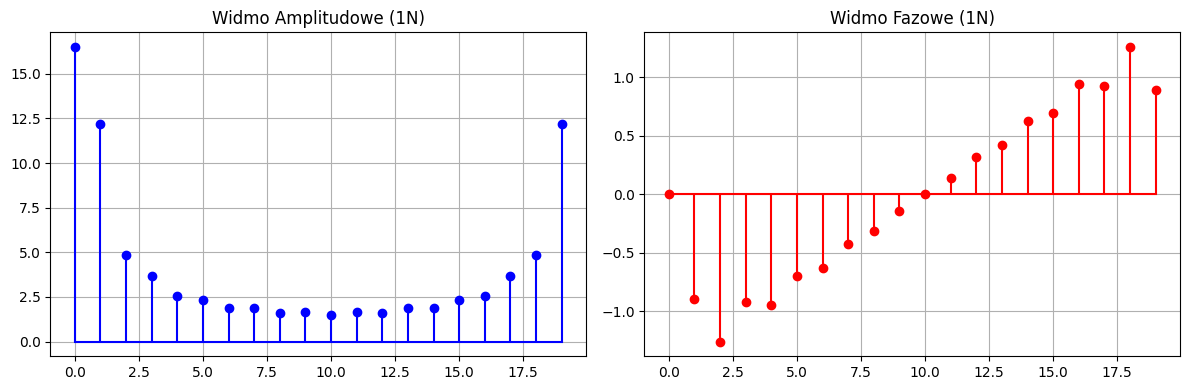

In [329]:
spectrum_plot(10, signal, N)

Wykresy dla dopełnienia równego 40:

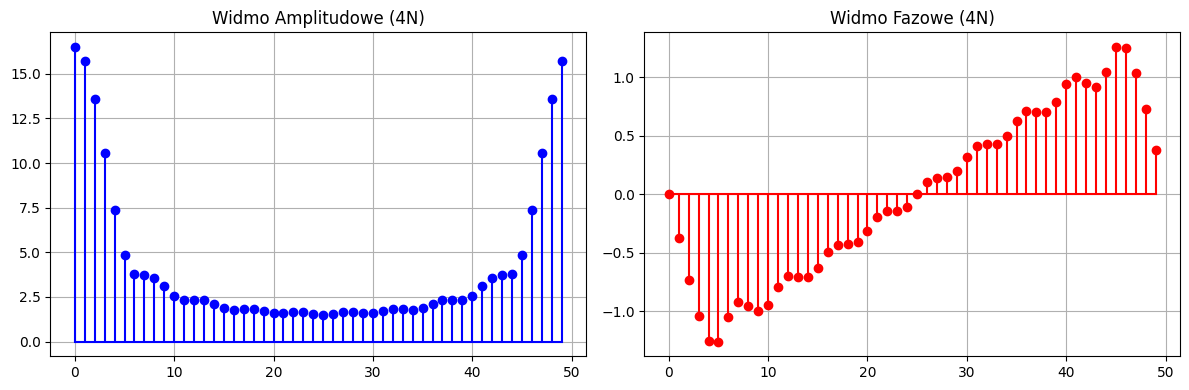

In [330]:
spectrum_plot(40, signal, N)

Wykresy dla dopełnienia równego 90:

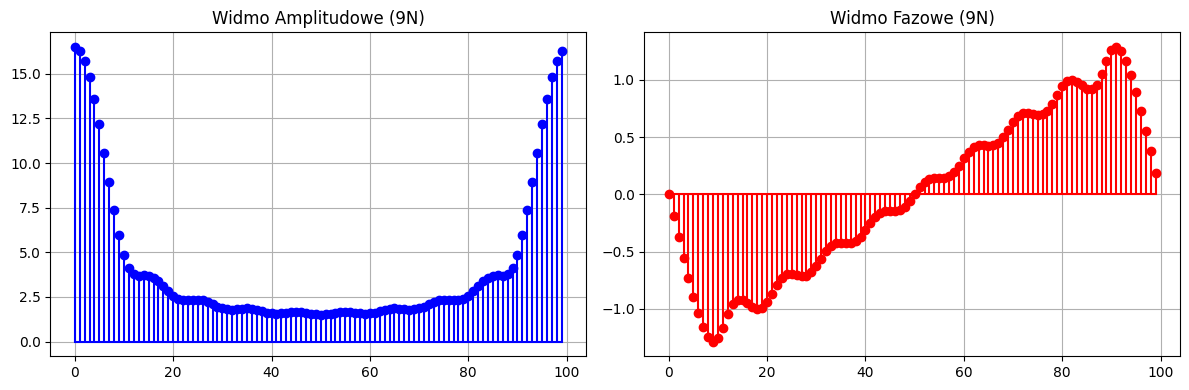

In [331]:
spectrum_plot(90, signal, N)

Zwiększając dopełnienie zagęszczamy wykresy widma amplitudowego i fazowego. Nie otrzymujemy nowych częstotliwości, jedynie zwiększamy rozdzielczość dyskretnej transformaty Fouriera.

## Zadanie 4

Dane z treści zadania:

In [332]:
A1, f1 = 0.1, 3000
A2, f2 = 0.4, 4000
A3, f3 = 0.8, 10000
fs = 48000

N1 = 2048
N2 = 3 * N1 // 2

Funkcja sygnału rzeczywistego s(t):

In [333]:
def signal_r(A1, A2, A3, f1, f2, f3, t):
    return (A1 * np.sin(2 * np.pi * f1 * t) +
            A2 * np.sin(2 * np.pi * f2 * t) +
            A3 * np.sin(2 * np.pi * f3 * t))

Funckja gęstości:

In [334]:
def psd(signal):
    N = len(signal)
    fft_val = np.fft.fft(signal)
    psd_values = 2 * np.abs(fft_val) / N
    psd_values[0] = psd_values[0] / 2
    return psd_values

Wykres widmowej gęstości mocy sygnału spróbkowanego dla N1 = 2048

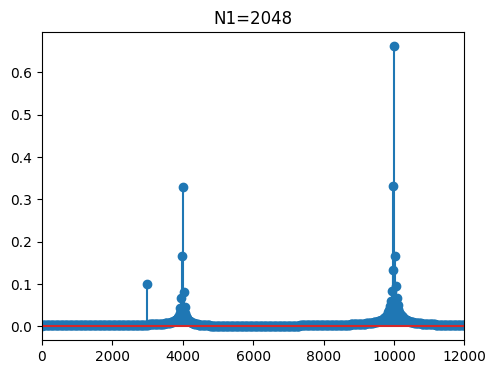

In [335]:
s1 = np.array([signal_r(A1, A2, A3, f1, f2, f3, n / fs) for n in range(N1)])

psd1 = psd(s1)
freq1 = np.fft.fftfreq(N1, 1 / fs)

plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.stem(freq1, psd1)
plt.xlim(0, 12000)
plt.title(f'N1={N1}')
plt.show()

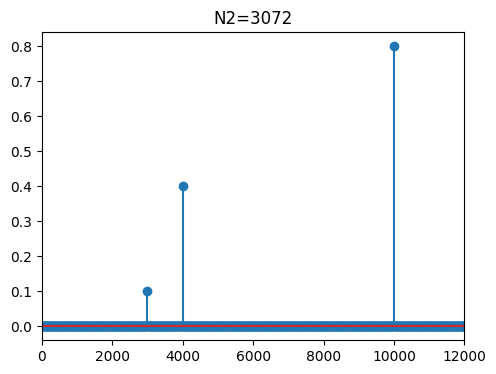

In [336]:
s2 = np.array([signal_r(A1, A2, A3, f1, f2, f3, n / fs) for n in range(N2)])

psd2 = psd(s2)
freq2 = np.fft.fftfreq(N2, 1 / fs)

plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.stem(freq2, psd2)
plt.xlim(0, 12000)
plt.title(f'N2={N2}')
plt.show()

#### Czy dla podanej liczby próbek mamy do czynienia ze zjawiskiem przecieku widma?

Tak, we wszystkich 3 przypadkach możemy zauważyć przeciek widma na pobliskie częstotliwości.

#### Czy sytuacja uległaby zmianie dla liczby próbek N2 = 3/2 * N1?

Tak, dla N2 = 3072 sytuacja ulega zmianie. Po zwiększeniu liczby próbek widmo staje się bardziej szczegółowe i precyzyjniej odwzorowuje częstotliwośći.